<a href="https://colab.research.google.com/github/JaiderSantos/metodos1_JaiderSantos_NicolasGomez/blob/main/Tarea4/Algebra_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


# Punto 1
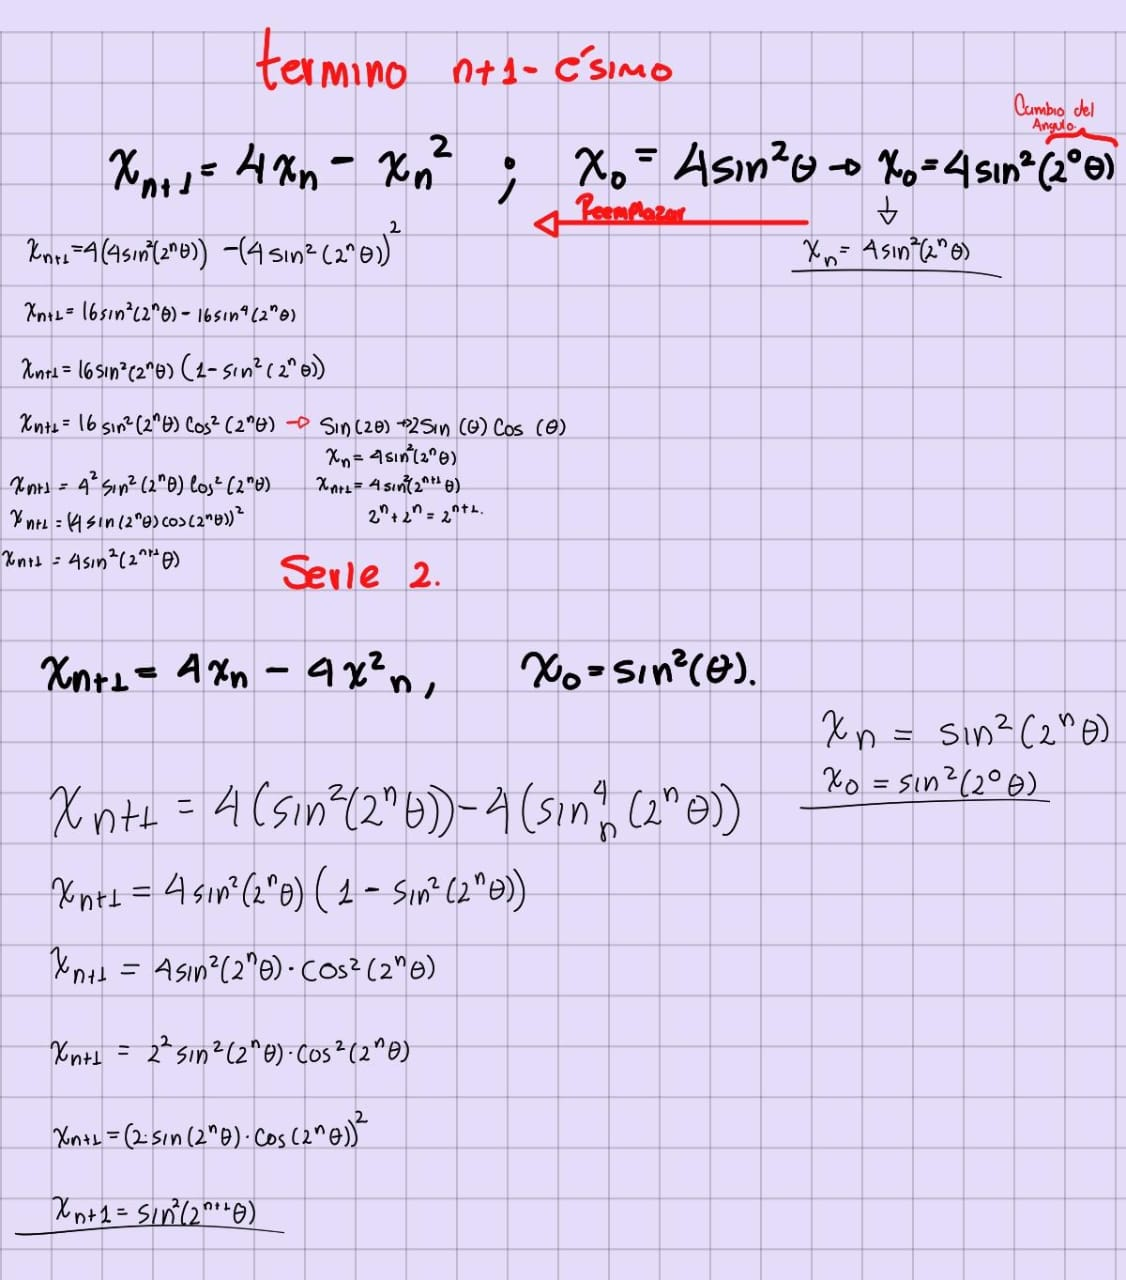


#Punto 2

#Punto 3

In [22]:
class LinearSolver:
    def __init__(self, A, b, tol=1e-16, max_iterations=1000):

        self.A = np.array(A, dtype=float)
        self.b = np.array(b, dtype=float)
        self.tol = tol
        self.max_iterations = max_iterations
        self.n = len(b)

    def jacobi(self, x0=None):

        if x0 is None:
            x = np.zeros(self.n)
        else:
            x = np.array(x0, dtype=float)

        x_new = np.copy(x)
        iter_count = 0

        for k in range(self.max_iterations):
            iter_count += 1
            for i in range(self.n):
                sum1 = sum(self.A[i][j] * x[j] for j in range(self.n) if j != i)
                x_new[i] = (self.b[i] - sum1) / self.A[i][i]

            if np.linalg.norm(x_new - x, ord=np.inf) < self.tol:
                print(f"Jacobi convergió en {iter_count} iteraciones.")
                return x_new
            x = np.copy(x_new)

        print(f"Jacobi no convergió después de {self.max_iterations} iteraciones.")
        return x_new

    def gauss_seidel(self, x0=None):

        if x0 is None:
            x = np.zeros(self.n)
        else:
            x = np.array(x0, dtype=float)

        iter_count = 0

        for k in range(self.max_iterations):
            iter_count += 1
            x_old = np.copy(x)

            for i in range(self.n):
                sum1 = sum(self.A[i][j] * x[j] for j in range(i))
                sum2 = sum(self.A[i][j] * x_old[j] for j in range(i + 1, self.n))
                x[i] = (self.b[i] - sum1 - sum2) / self.A[i][i]

            if np.linalg.norm(x - x_old, ord=np.inf) < self.tol:
                print(f"Gauss-Seidel convergió en {iter_count} iteraciones.")
                return x

        print(f"Gauss-Seidel no convergió después de {self.max_iterations} iteraciones.")
        return x

In [23]:
A = np.array([[3,-1,-1],[-1,3,1],[2,1,4]])
b = np.array([1.,3.,7.])
x0 = np.array([0.,0.,0.])
solver = LinearSolver(A, b)
print(solver.jacobi(x0))
print(solver.gauss_seidel(x0))

Jacobi convergió en 36 iteraciones.
[1. 1. 1.]
Gauss-Seidel convergió en 28 iteraciones.
[1. 1. 1.]


#Punto 4

In [24]:
def matrix_multiply(A, B):
  # Obtener las dimensiones de las matrices
    m = len(A)
    n = len(A[0])
    p = len(B[0])

    # Inicializar la matriz de resultado C con ceros
    C = [[0 for _ in range(p)] for _ in range(m)]

    # Realizar la multiplicación de matrices
    for i in range(m):
        for j in range(p):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]

    return C

In [27]:
Amatrix = np.array([[1,0,0],[5,1,0],[-2,3,1]])
Bmatrix = np.array([[4,-2,1],[0,3,7],[0,0,2]])
print(matrix_multiply(Amatrix,Bmatrix)[0])
print(matrix_multiply(Amatrix,Bmatrix)[1])
print(matrix_multiply(Amatrix,Bmatrix)[2])

[4, -2, 1]
[20, -7, 12]
[-8, 13, 21]
